<a href="https://colab.research.google.com/github/jb19074/Finance-App-Reviews/blob/main/StashAwayAppReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vaderSentiment
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import vaderSentiment

from google_play_scraper import app
from google_play_scraper import Sort, reviews_all, reviews

vds = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
us_reviews = reviews_all(
    'com.awp.stashaway',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='sg', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [4]:
df = pd.DataFrame(np.array(us_reviews),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))

df.head(25)

reviewId               userName  \
0   35c36bd7-6459-4a63-920c-4a7347fd56df        Stephen Roberts   
1   6e2eabc1-52a7-4308-8ba6-d742f6827889           Sandip Mitra   
2   d6399566-3480-47e2-b2ea-17f42a8597b5     Charles Napitupulu   
3   f406e700-e6cd-40a4-bd18-61a1a07e0ac5     Norman.l Denniess.   
4   57b587f8-8f90-4655-9383-e50ae0fdfa4a          Nicholas Hong   
5   2e58d300-d536-442f-ba3c-4c2c02992ba3               Amos Lim   
6   6de54f4a-1f27-40d4-92be-edff0985cd8f             Cyril Wong   
7   436fcf58-cbf7-4350-98a3-8b241e3a0c62                    D Y   
8   a00ea02b-b7f9-4ace-ad61-058d83c98632              Joyce Low   
9   50b92d99-ad61-4347-9435-3c57cca9ebba              Sky Recon   
10  c920d2fc-7fa9-415f-be6b-f7fa09329df1         Shovan Traager   
11  6286938d-cfd8-4a5b-94f5-3b27d65f56df          ong kam siong   
12  2de1644f-1d07-4fd4-8b96-c244799f49f4                Ian Teh   
13  43e5cde2-8518-47b6-8eeb-b3444d578f76     Sahadehvah Suppiah   
14  82c73d48-2467-46ad-ba1a-87605a053480              Alvin Tan   
15  0deea9cb-2176-4b50-a39a-66cf06bb3822            Jeremy Heng   
16  a3859562-bf89-468e-9aa3-e5d62d603586          Wong Sai Ming   
17  ecce0162-1edd-403b-9f1a-ee72e389c8aa           Simeon Adoki   
18  4d298999-d5df-47ca-9169-a48bd6724e30               D_ft Kid   
19  9ed427f5-29e5-4c09-8dc9-a3204b6a70a3            Ahmad Baqir   
20  2340bf33-4642-4661-941f-5a17fab5120d             Joshua Eng   
21  244e984b-7154-424d-b40e-37948a066344           benjamin lee   
22  c7e39aec-abe4-4b5f-bd64-17846179bd30         Danish Jailany   
23  9d52f44d-728d-49e9-b8fe-c90aa94d7d16            Alfred Pang   
24  5f0e66f9-87bf-4593-8c3f-614d9df9844a  Hermilyn Dimaculangan   

                                            userImage  \
0   https://play-lh.googleusercontent.com/a-/AD5-W...   
1   https://play-lh.googleusercontent.com/a-/AD5-W...   
2   https://play-lh.googleusercontent.com/a-/AD5-W...   
3   https://play-lh.googleusercontent.com/a-/AD5-W...   
4   https://play-lh.googleusercontent.com/a/AEdFTp...   
5   https://play-lh.googleusercontent.com/a/AEdFTp...   
6   https://play-lh.googleusercontent.com/a-/AD5-W...   
7   https://play-lh.googleusercontent.com/a/AEdFTp...   
8   https://play-lh.googleusercontent.com/a/AEdFTp...   
9   https://play-lh.googleusercontent.com/a-/AD5-W...   
10  https://play-lh.googleusercontent.com/a-/AD5-W...   
11  https://play-lh.googleusercontent.com/a-/AD5-W...   
12  https://play-lh.googleusercontent.com/a/AEdFTp...   
13  https://play-lh.googleusercontent.com/a/AEdFTp...   
14  https://play-lh.googleusercontent.com/a-/AD5-W...   
15  https://play-lh.googleusercontent.com/a/AEdFTp...   
16  https://play-lh.googleusercontent.com/a-/AD5-W...   
17  https://play-lh.googleusercontent.com/a/AEdFTp...   
18  https://play-lh.googleusercontent.com/a-/AD5-W...   
19  https://play-lh.googleusercontent.com/a-/AD5-W...   
20  https://play-lh.googleusercontent.com/a/AEdFTp...   
21  https://play-lh.googleusercontent.com/a-/AD5-W...   
22  https://play-lh.googleusercontent.com/a-/AD5-W...   
23  https://play-lh.googleusercontent.com/a/AEdFTp...   
24  https://play-lh.googleusercontent.com/a-/AD5-W...   

                                              content  score  thumbsUpCount  \
0   I should have done this ages ago 😁 The app is ...      5              0   
1   Love the cleaner new interface. One of the eas...      5              0   
2   App is good and intuitive. Returns? So far los...      1              0   
3                          Money for food and bills..      5              0   
4                          User experience is great !      5              0   
5   Horrible place.... am closing my account. Tota...      1             38   
6   A Fintech company couldn't even manage to send...      1              0   
7   Don't do in-app update if you can't do it bett...      1              3   
8   I have been investing consistently in stashawa...      4              0   
9   Investment A

In [5]:
content = " ".join(content for content in df.content)

In [6]:
stop_words = ['invest', 'investing', 'investment', 'Stashaway', 'app', 'use', 'money'] + list(STOPWORDS)

In [7]:
word_cloud = WordCloud(stopwords = stop_words, collocations = False, background_color = 'white', width=3000, height=2000, max_words=500).generate(content)

(-0.5, 2999.5, 1999.5, -0.5)

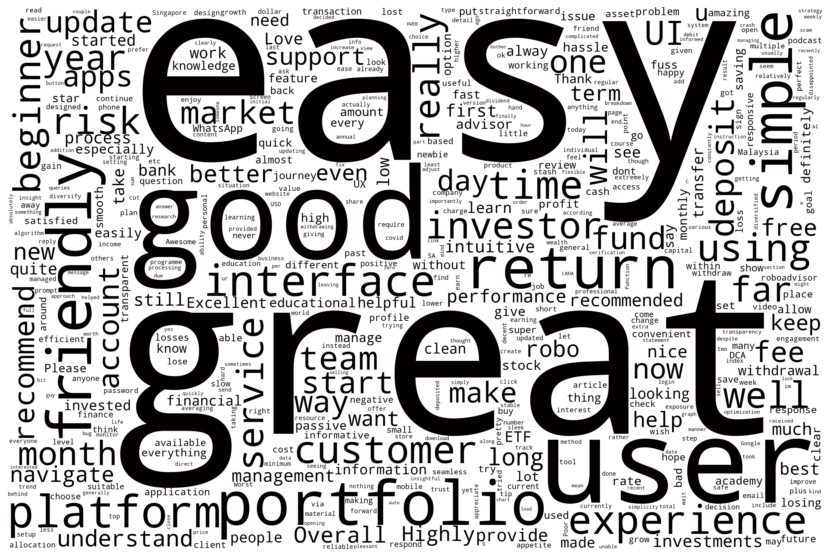

In [8]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the word color to black
word_cloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(word_cloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

In [9]:
#@title Compound Scores
df['compound'] = [vds.polarity_scores(x)['compound'] for x in df['content']]
df['neg'] = [vds.polarity_scores(x)['neg'] for x in df['content']]
df['neu'] = [vds.polarity_scores(x)['neu'] for x in df['content']]
df['pos'] = [vds.polarity_scores(x)['pos'] for x in df['content']]

for sentence in df['content']:
    vs = vds.polarity_scores(sentence)
    #print("{:-<65} {}".format(sentence, str(vs)))
  

In [10]:
#df['scores'] = df['content'].apply(lambda review: vds.polarity_scores(content))
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

reviewId            userName  \
0  35c36bd7-6459-4a63-920c-4a7347fd56df     Stephen Roberts   
1  6e2eabc1-52a7-4308-8ba6-d742f6827889        Sandip Mitra   
2  d6399566-3480-47e2-b2ea-17f42a8597b5  Charles Napitupulu   
3  f406e700-e6cd-40a4-bd18-61a1a07e0ac5  Norman.l Denniess.   
4  57b587f8-8f90-4655-9383-e50ae0fdfa4a       Nicholas Hong   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AD5-W...   
1  https://play-lh.googleusercontent.com/a-/AD5-W...   
2  https://play-lh.googleusercontent.com/a-/AD5-W...   
3  https://play-lh.googleusercontent.com/a-/AD5-W...   
4  https://play-lh.googleusercontent.com/a/AEdFTp...   

                                             content  score  thumbsUpCount  \
0  I should have done this ages ago 😁 The app is ...      5              0   
1  Love the cleaner new interface. One of the eas...      5              0   
2  App is good and intuitive. Returns? So far los...      1              0   
3                         Money for food and bills..      5              0   
4                         User experience is great !      5              0   

  reviewCreatedVersion                  at  \
0             15.429.0 2023-01-16 03:15:31   
1             15.429.0 2023-01-14 14:53:37   
2             15.429.0 2023-01-11 11:24:48   
3             15.419.1 2023-01-10 12:33:29   
4             15.408.0 2023-01-09 10:01:40   

                                        replyContent           repliedAt  \
0  Hi Stephen, we are glad to hear that you’re en... 2023-01-16 04:36:23   
1  Hi Sandip! Thank you for your feedback, we tru... 2023-01-15 02:35:00   
2                                               None                 NaT   
3  Hi Norman,\n\nThanks a lot for taking the time... 2023-01-10 13:40:53   
4  Hi,\n\nWe would like to thank you for sharing ... 2023-01-09 10:40:32   

   compound    neg    neu    pos comp_score  
0    0.8817  0.000  0.746  0.254        pos  
1    0.7783  0.069  0.616  0.315        pos  
2   -0.4549  0.231  0.672  0.097        neg  
3    0.0000  0.000  1.000  0.000        pos  
4    0.6588  0.000  0.406  0.594        pos

In [11]:
pos_content = df[df.comp_score == 'pos']
neg_content = df[df.comp_score == 'neg']

In [12]:
pos_content.head(3)

reviewId            userName  \
0  35c36bd7-6459-4a63-920c-4a7347fd56df     Stephen Roberts   
1  6e2eabc1-52a7-4308-8ba6-d742f6827889        Sandip Mitra   
3  f406e700-e6cd-40a4-bd18-61a1a07e0ac5  Norman.l Denniess.   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AD5-W...   
1  https://play-lh.googleusercontent.com/a-/AD5-W...   
3  https://play-lh.googleusercontent.com/a-/AD5-W...   

                                             content  score  thumbsUpCount  \
0  I should have done this ages ago 😁 The app is ...      5              0   
1  Love the cleaner new interface. One of the eas...      5              0   
3                         Money for food and bills..      5              0   

  reviewCreatedVersion                  at  \
0             15.429.0 2023-01-16 03:15:31   
1             15.429.0 2023-01-14 14:53:37   
3             15.419.1 2023-01-10 12:33:29   

                                        replyContent           repliedAt  \
0  Hi Stephen, we are glad to hear that you’re en... 2023-01-16 04:36:23   
1  Hi Sandip! Thank you for your feedback, we tru... 2023-01-15 02:35:00   
3  Hi Norman,\n\nThanks a lot for taking the time... 2023-01-10 13:40:53   

   compound    neg    neu    pos comp_score  
0    0.8817  0.000  0.746  0.254        pos  
1    0.7783  0.069  0.616  0.315        pos  
3    0.0000  0.000  1.000  0.000        pos

In [13]:
neg_content.head(3)

reviewId            userName  \
2  d6399566-3480-47e2-b2ea-17f42a8597b5  Charles Napitupulu   
5  2e58d300-d536-442f-ba3c-4c2c02992ba3            Amos Lim   
6  6de54f4a-1f27-40d4-92be-edff0985cd8f          Cyril Wong   

                                           userImage  \
2  https://play-lh.googleusercontent.com/a-/AD5-W...   
5  https://play-lh.googleusercontent.com/a/AEdFTp...   
6  https://play-lh.googleusercontent.com/a-/AD5-W...   

                                             content  score  thumbsUpCount  \
2  App is good and intuitive. Returns? So far los...      1              0   
5  Horrible place.... am closing my account. Tota...      1             38   
6  A Fintech company couldn't even manage to send...      1              0   

  reviewCreatedVersion                  at  \
2             15.429.0 2023-01-11 11:24:48   
5             15.419.1 2023-01-07 01:25:52   
6             15.419.1 2023-01-02 08:02:43   

                                        replyContent           repliedAt  \
2                                               None                 NaT   
5  Hi Amos, it surely has been a turbulent time f... 2023-01-12 07:55:52   
6  Hi Cyril! We're sorry to hear that you're expe... 2023-01-02 08:48:41   

   compound    neg    neu    pos comp_score  
2   -0.4549  0.231  0.672  0.097        neg  
5   -0.9487  0.348  0.652  0.000        neg  
6   -0.4767  0.136  0.864  0.000        neg

# Negative Review Word Cloud

In [14]:
negative_review = " ".join(content for content in neg_content.content)
word_cloud = WordCloud(stopwords = stop_words, collocations = False, background_color = 'white', width=3000, height=2000, max_words=500).generate(negative_review)

(-0.5, 2999.5, 1999.5, -0.5)

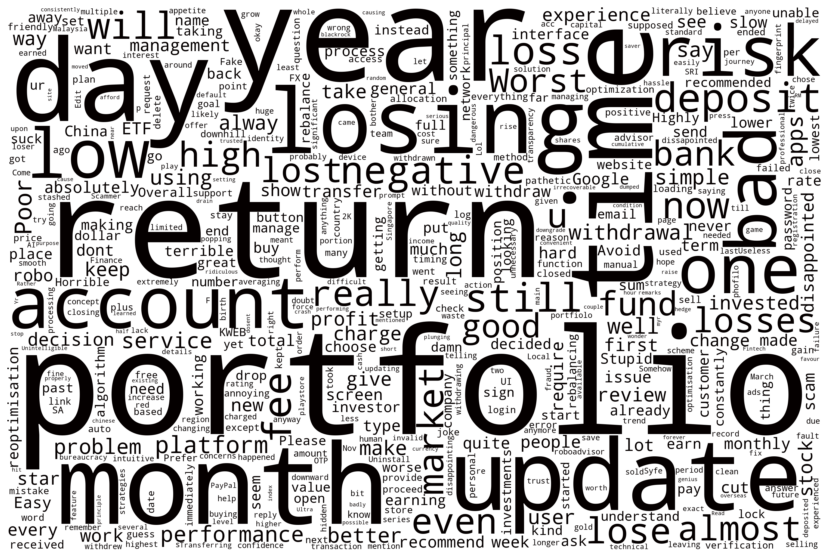

In [15]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the word color to black
word_cloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(word_cloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

# Postive Review Word Cloud

In [16]:
positive_review = " ".join(content for content in pos_content.content)
word_cloud = WordCloud(stopwords = stop_words, collocations = False, background_color = 'white', width=3000, height=2000, max_words=500).generate(positive_review)

(-0.5, 2999.5, 1999.5, -0.5)

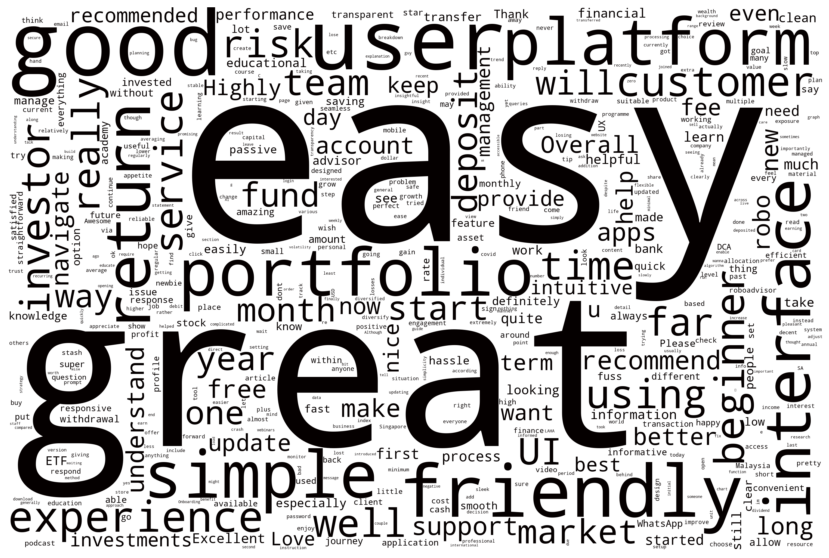

In [17]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the word color to black
word_cloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(word_cloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

# Text Preprocessing

In [18]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [50]:
# Clean the data
df["content"] = df["content"].str.lower()
df["content"] = df["content"].str.replace(r"[^a-zA-Z0-9]", " ")
df["content"] = df["content"].str.strip()

#text_data = df["content"].tolist()
text_data = df['content'].values.tolist()
text_data

<ipython-input-50-48b00e25e6f8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["content"] = df["content"].str.replace(r"[^a-zA-Z0-9]", " ")


['i should have done this ages ago   the app is easy to use  but more important is the range of options you have  along with superb account management by stash away advisors and partners',
 'love the cleaner new interface  one of the easiest investment platform around for new starters and people with limited investment knowledge',
 'app is good and intuitive  returns  so far loss almost 18  and every month still need to pay fee for managing my investment',
 'money for food and bills',
 'user experience is great',
 'horrible place     am closing my account  total cumulative losses since i started is at 18   the past 2 years really did not favour stocks  and stashaway did not help with reoptimisation and dumped kweb at a very bad time last year  too',
 'a fintech company couldn t even manage to send an otp properly  no otp is received or it s delayed for more than half an hour when setting up an account',
 'don t do in app update if you can t do it better than google  forces user to setu

In [20]:
import string

text_data = [text.translate(str.maketrans("", "", string.punctuation)) for text in text_data]
text_data = [text.translate(str.maketrans("", "", string.digits)) for text in text_data]

text_data

['i should have done this ages ago   the app is easy to use  but more important is the range of options you have  along with superb account management by stash away advisors and partners',
 'love the cleaner new interface  one of the easiest investment platform around for new starters and people with limited investment knowledge',
 'app is good and intuitive  returns  so far loss almost   and every month still need to pay fee for managing my investment',
 'money for food and bills',
 'user experience is great',
 'horrible place     am closing my account  total cumulative losses since i started is at    the past  years really did not favour stocks  and stashaway did not help with reoptimisation and dumped kweb at a very bad time last year  too',
 'a fintech company couldn t even manage to send an otp properly  no otp is received or it s delayed for more than half an hour when setting up an account',
 'don t do in app update if you can t do it better than google  forces user to setup dev

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words("english"))
stop_words = ['invest', 'investing', 'investment', 'Stashaway', 'stashaway', 'easy', 'great', 'good', 'bad', 'App', 'app', 'use', 'money'] + list(STOPWORDS)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
from tqdm import tqdm
reviews_processed = []
for sentence in tqdm(text_data):
    reviews_processed.append(' '.join(token.lower() for token in nltk.word_tokenize(sentence) if token.lower() not in stop_words))

text_data = reviews_processed
text_data

100%|██████████| 1666/1666 [00:00<00:00, 5008.37it/s]


['done ages ago app important range options along superb account management stash away advisors partners',
 'love cleaner new interface one easiest platform around new starters people limited knowledge',
 'app intuitive returns far loss almost every month still need pay fee managing',
 'food bills',
 'user experience',
 'horrible place closing account total cumulative losses since started past years really favour stocks help reoptimisation dumped kweb bad time last year',
 'fintech company even manage send otp properly otp received delayed half hour setting account',
 'app update better google forces user setup device lock screen unintelligible action edit still extremely slow app update experience months',
 'consistently year still earning profit yet rather loss would say hedge currency risk times myr performing badly also try simple afford losses',
 'app rebalancing happened lose rm k market selling position causing losses',
 'app begginers dont know start',
 'overall pleasant experi

In [23]:
text_data

['done ages ago app important range options along superb account management stash away advisors partners',
 'love cleaner new interface one easiest platform around new starters people limited knowledge',
 'app intuitive returns far loss almost every month still need pay fee managing',
 'food bills',
 'user experience',
 'horrible place closing account total cumulative losses since started past years really favour stocks help reoptimisation dumped kweb bad time last year',
 'fintech company even manage send otp properly otp received delayed half hour setting account',
 'app update better google forces user setup device lock screen unintelligible action edit still extremely slow app update experience months',
 'consistently year still earning profit yet rather loss would say hedge currency risk times myr performing badly also try simple afford losses',
 'app rebalancing happened lose rm k market selling position causing losses',
 'app begginers dont know start',
 'overall pleasant experi

In [24]:
# Perform lemmatization
lemmatizer = WordNetLemmatizer()

from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

# Lemmatize the text data

#text_data = [[lemmatizer.lemmatize(word, pos_tag([word])[0][1]) for word in text] for text in text_data]
#text_data

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [25]:
# Perform vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#text_data = vectorizer.fit_transform(text_data.apply(lambda text_data: " ".join(text_data)))

from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()
# Vectorize the text data
X = vectorizer.fit_transform(text_data)
print(X)

  (0, 2047)	0.33804599385237705
  (0, 74)	0.26762276908853744
  (0, 251)	0.23312270575794267
  (0, 2782)	0.23953754744547312
  (0, 1750)	0.19464990610513325
  (0, 24)	0.17945784691494143
  (0, 2860)	0.28997466439290126
  (0, 115)	0.2722329669831449
  (0, 1997)	0.25289995203340127
  (0, 2299)	0.28997466439290126
  (0, 1415)	0.28322958408312066
  (0, 167)	0.09063666280091599
  (0, 91)	0.2634523378076621
  (0, 90)	0.32030429644262065
  (0, 830)	0.2561426508287098
  (1, 1592)	0.24438926753703027
  (1, 1664)	0.3213759241343735
  (1, 2075)	0.23124736841282967
  (1, 2777)	0.36344398699271413
  (1, 193)	0.25817359285250946
  (1, 2127)	0.16987976725351187
  (1, 882)	0.338081661115462
  (1, 1972)	0.19513039527855774
  (1, 1503)	0.16418120032892863
  (1, 1908)	0.4230050771354436
  :	:
  (1659, 1849)	0.566672015584425
  (1659, 2127)	0.1957288080325523
  (1659, 167)	0.11849273519710815
  (1660, 441)	0.36285659412922044
  (1660, 1739)	0.3162856448663504
  (1660, 484)	0.2716416618371395
  (1660, 1243

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Print the cluster assignments for each document
print(kmeans.labels_)

[3 0 1 ... 3 3 3]


In [27]:
# Print the cluster centroids (i.e., the mean of the vectors in each cluster)
print(kmeans.cluster_centers_)

[[0.         0.         0.00131531 ... 0.         0.         0.0031185 ]
 [0.         0.         0.0020339  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.0006071  0.0004004  0.00173352 ... 0.00033252 0.00041283 0.00068307]
 [0.         0.         0.00212814 ... 0.         0.         0.        ]]


In [28]:

# Perform t-SNE dimensionality reduction on the vectorized data
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X.toarray())

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


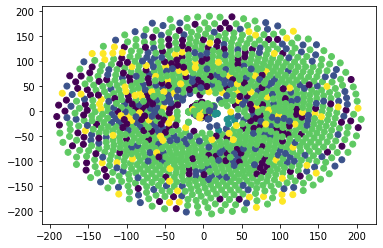

In [29]:
# Plot the clusters in the t-SNE space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


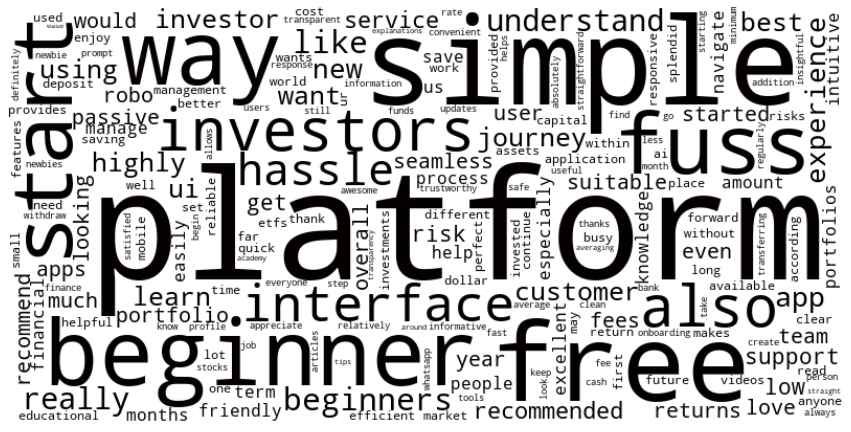

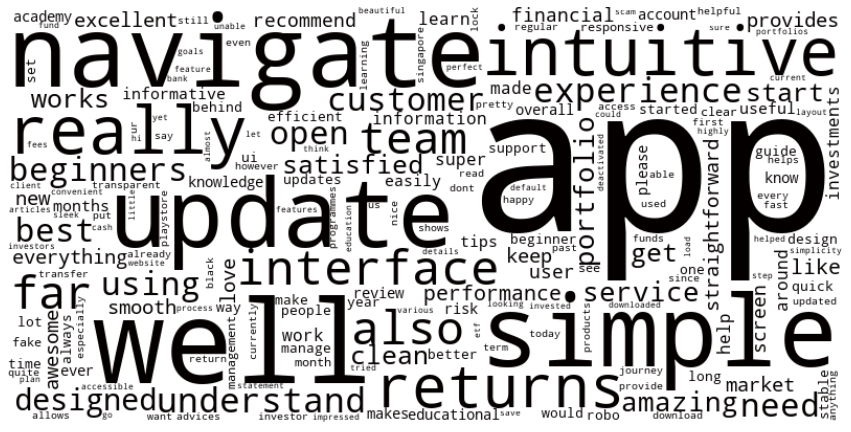

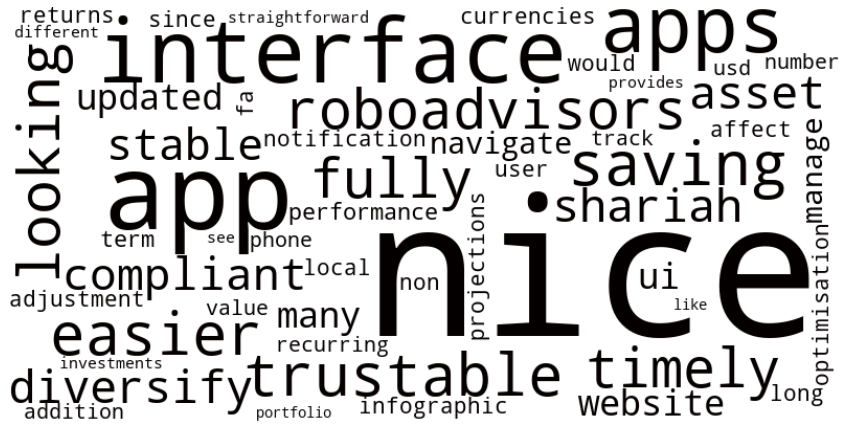

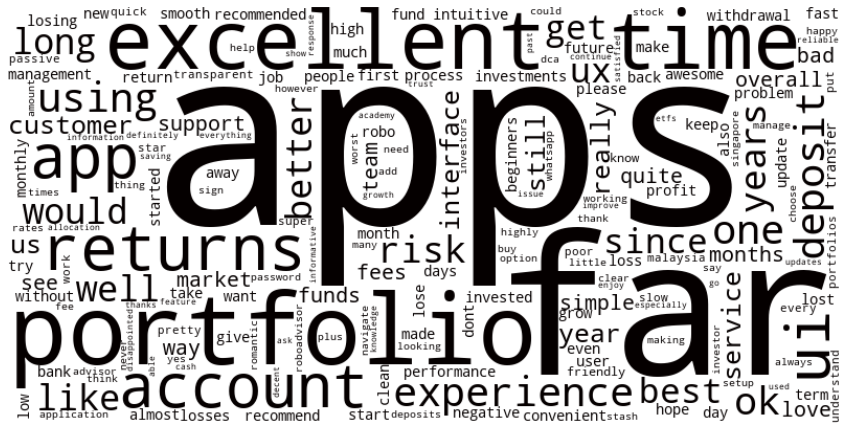

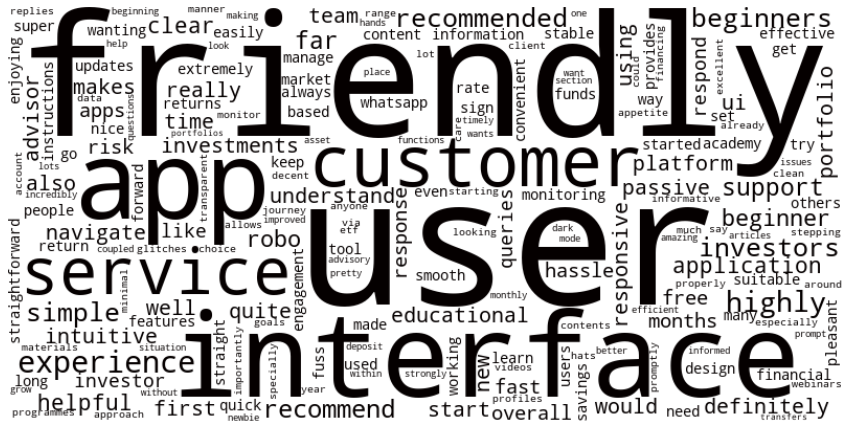

In [30]:
# Get the cluster assignments for each document
clusters = kmeans.labels_

# Create a dictionary of the words and their TF-IDF scores for each cluster
word_scores = {}
for i in range(kmeans.n_clusters):
    # Get the indices of the documents in the current cluster
    cluster_indices = [j for j, x in enumerate(clusters) if x == i]
    # Get the TF-IDF scores for the words in the current cluster
    cluster_scores = X[cluster_indices, :].sum(axis=0)
    # Convert the TF-IDF scores to a dictionary
    word_scores[i] = dict(zip(vectorizer.get_feature_names(), cluster_scores.flat))

# Create a word cloud for each cluster
for i in range(kmeans.n_clusters):
    wordcloud = WordCloud(background_color="white", width=800, height=400)
    wordcloud.generate_from_frequencies(word_scores[i])
    # set the word color to black
    wordcloud.recolor(color_func = black_color_func)
    # set the figsize
    plt.figure(figsize=[15,10])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [46]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

text_data = df['content'].values.tolist()

# Tokenize the text data
text_data = [text.split() for text in text_data]
text_data

[['i',
  'should',
  'have',
  'done',
  'this',
  'ages',
  'ago',
  'the',
  'app',
  'is',
  'easy',
  'to',
  'use',
  'but',
  'more',
  'important',
  'is',
  'the',
  'range',
  'of',
  'options',
  'you',
  'have',
  'along',
  'with',
  'superb',
  'account',
  'management',
  'by',
  'stash',
  'away',
  'advisors',
  'and',
  'partners'],
 ['love',
  'the',
  'cleaner',
  'new',
  'interface',
  'one',
  'of',
  'the',
  'easiest',
  'investment',
  'platform',
  'around',
  'for',
  'new',
  'starters',
  'and',
  'people',
  'with',
  'limited',
  'investment',
  'knowledge'],
 ['app',
  'is',
  'good',
  'and',
  'intuitive',
  'returns',
  'so',
  'far',
  'loss',
  'almost',
  '18',
  'and',
  'every',
  'month',
  'still',
  'need',
  'to',
  'pay',
  'fee',
  'for',
  'managing',
  'my',
  'investment'],
 ['money', 'for', 'food', 'and', 'bills'],
 ['user', 'experience', 'is', 'great'],
 ['horrible',
  'place',
  'am',
  'closing',
  'my',
  'account',
  'total',
  'cu

In [47]:
# Create a dictionary of the text data
dictionary = Dictionary(text_data)

In [48]:
# Create a corpus of bag-of-words representations of the text data
corpus = [dictionary.doc2bow(doc) for doc in dictionary]

TypeError: ignored

In [36]:
X

<1666x3323 sparse matrix of type '<class 'numpy.float64'>'
	with 19291 stored elements in Compressed Sparse Row format>

In [35]:
# Train an LDA model on the corpus with 5 topics
#lda = LdaModel(corpus, num_topics=5, id2word=dictionary)
lda = LdaModel(X, num_topics=5)

ValueError: ignored

In [ ]:
# Print the topics
print(lda.print_topics())

In [ ]:
#vis
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=5)
vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, mds="mmds", R=5)
vis

In [ ]:
text_data